<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 31.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=b1655c4d602d43d572e992892598bf208ebd429ec200b6de0f616bcde98013db
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#Import the libraries
import pandas as pd
import pandas as xlsx

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import datetime as dt
import pandas_datareader.data as web
# Datos
import yfinance as yfin
# Gráficos 
import matplotlib.pyplot as plt
# Manejo de archivos en Google Colab
from google.colab import files 

In [3]:
from google.colab import files 

In [36]:
# Seleccionar el archivo para subir
files.upload()

Saving Energy5.xlsx to Energy5.xlsx


{'Energy5.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [37]:
df = pd.read_excel('Energy5.xlsx')
df

,Date,Energy
0,2020-01-01,70.812
1,2020-02-01,74.583
2,2020-03-01,75.369
3,2020-04-01,55.552
4,2020-05-01,56.898
...,...,...
187,2035-08-01,43.204
188,2035-09-01,48.858
189,2035-10-01,51.390
190,2035-11-01,85.179


In [38]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Energy
Date,
2020-01-01,70.812
2020-02-01,74.583
2020-03-01,75.369
2020-04-01,55.552
2020-05-01,56.898
...,...
2035-08-01,43.204
2035-09-01,48.858
2035-10-01,51.390


In [93]:
# Descargamos datos de 2 años de la acción de Apple.
# df = yfin.download('AAPL', data_source='yahoo', start='2000-01-01')
# df

In [39]:
df.reset_index(inplace=True)

In [40]:
 data=df

In [41]:
data=data.rename(columns={"Date": "ds", "Energy": "y"})

In [42]:
#now it is usable for FB Prophet
data.head()

,ds,y
0,2020-01-01,70.812
1,2020-02-01,74.583
2,2020-03-01,75.369
3,2020-04-01,55.552
4,2020-05-01,56.898


In [43]:
len(data)

192

In [44]:
df_train=data[0:191]
# df_test=data[5287:5487]

In [45]:
m = Prophet()
m.fit(df_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=182,freq='M',include_history=True)

In [47]:
forecast = m.predict(future)

In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
368,2050-08-31,97.463654,79.129040,117.621799
369,2050-09-30,98.064122,78.924529,115.977791
370,2050-10-31,103.053817,82.215928,122.540574
371,2050-11-30,101.260762,81.936476,119.867759
372,2050-12-31,100.580751,81.549384,119.831368


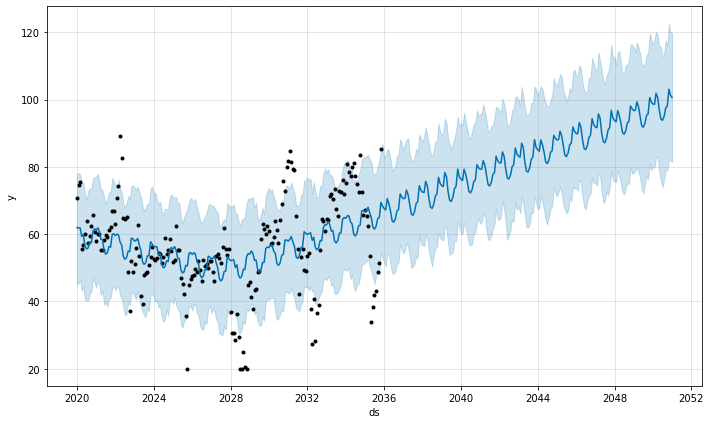

In [49]:
fig1 = m.plot(forecast)

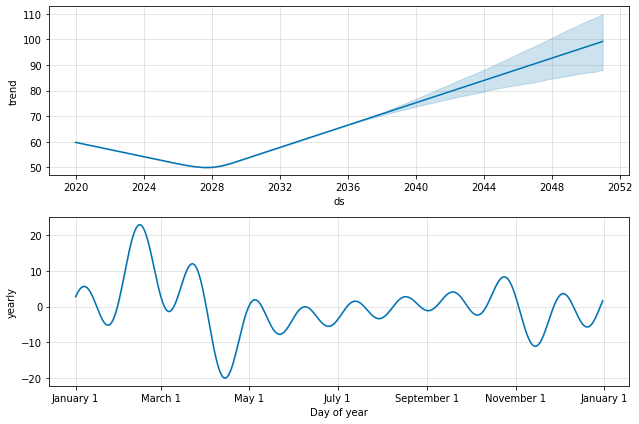

In [50]:
fig2 = m.plot_components(forecast)